In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('member_sample.csv', index_col = 0)

In [3]:
df.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [4]:
df['City'].value_counts()[:3].sum()

7247

In [5]:
df['State - Grouped'].value_counts()

RI    20937
CT      407
Name: State - Grouped, dtype: int64

In [6]:
df['Income'].describe()

count           11943
unique             15
top       100-149,999
freq             2577
Name: Income, dtype: object

In [7]:
df.groupby('State - Grouped')['Total Cost'].mean()

State - Grouped
CT    40.034405
RI    47.361980
Name: Total Cost, dtype: float64

In [8]:
df['FSV Mortgage Flag'].value_counts()

N    21317
Y       27
Name: FSV Mortgage Flag, dtype: int64

In [9]:
def y_n_to_binary(x):
    if x == 'Y':
        return 1
    else:
        return 0

In [10]:
df['FSV Mortgage Flag'] = df['FSV Mortgage Flag'].apply(y_n_to_binary)

In [11]:
[i for i in df.columns if i.startswith('Children')]

['Children']

In [12]:
df['Children'].value_counts()

Yes    6631
No     5379
Name: Children, dtype: int64

In [13]:
df.groupby('Children')['Number of Children'].describe()

,count,unique,top,freq
Children,,,,
No,5379,1,No children,5379
Yes,6631,7,One Child,3871


In [14]:
df['Number of Children'].value_counts().index

Index(['No children', 'One Child', 'Two Children', 'Three Children',
       'Four Children', 'Five Children', 'Six Children'],
      dtype='object')

In [15]:
vals = df['Number of Children'].value_counts().index
nums = list(range(7))

In [16]:
{v:n for v, n in zip(vals, nums)}

{'No children': 0,
 'One Child': 1,
 'Two Children': 2,
 'Three Children': 3,
 'Four Children': 4,
 'Five Children': 5,
 'Six Children': 6}

In [17]:
 df['Number of Children'].map({v:n for v, n in zip(vals, nums)})

0        NaN
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99994    NaN
99995    NaN
99996    2.0
99997    2.0
99998    2.0
Name: Number of Children, Length: 21344, dtype: float64

In [18]:
df['Number of Children'] = df['Number of Children'].map({v:n for v, n in zip(vals, nums)})

In [19]:
df.loc[(df['Number of Children'] == 0 )& (df['Children'] == 'Yes')].shape 

(103, 112)

In [20]:
[i for i in df.columns if i.startswith('')]

['Individual Key',
 'Household Key',
 'Member Flag',
 'City',
 'State - Grouped',
 'ZIP5',
 'ZIP9',
 'FSV CMSI Flag',
 'FSV Credit Card Flag',
 'FSV Deposit Program Flag',
 'FSV Home Equity Flag',
 'FSV ID Theft Flag',
 'FSV Mortgage Flag',
 'INS Client Flag',
 'TRV Globalware Flag',
 'Number of Children',
 'Responded to Catalog',
 'Race',
 'Length Of Residence',
 'Mail Responder',
 'Home Owner',
 'Income',
 'Date Of Birth',
 'Children',
 'Education',
 'Dwelling Type',
 'Credit Ranges',
 'Language',
 'Gender',
 'Active Expiration Date',
 'Address Change Date',
 'Bad Address Flag',
 'Billing Code Description',
 'Birth Date MMDDYYYY',
 'Branch Name',
 'Cancel Date',
 'Cancel Reason',
 'County',
 'Do Not Direct Mail Solicit',
 'Email Available',
 'Email Status',
 'ERS ENT Count Year 1',
 'ERS ENT Count Year 2',
 'ERS ENT Count Year 3',
 'ERS Member Cost Year 1',
 'ERS Member Cost Year 2',
 'ERS Member Cost Year 3',
 'Right_Gender',
 'Right_Individual Key',
 'Join AAA Date',
 'Join Club Da

In [21]:
df.groupby('Household Key').mean()

,Individual Key,ZIP5,ZIP9,FSV Mortgage Flag,Number of Children,Length Of Residence,Do Not Direct Mail Solicit,Email Available,ERS ENT Count Year 1,ERS ENT Count Year 2,...,Member Match Flag,Member Number and Associate ID,Plus Cost,Premier Cost,Rec ID,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Was Duplicated,Was Towed To AAR Referral
Household Key,,,,,,,,,,,,,,,,,,,,,
875.0,6.171366e+07,2920.777778,2.920950e+07,0.0,NaN,NaN,0.0,0.333333,0.785714,0.428571,...,1.0,2.271141e+07,26.571429,0.0,7.012414e+06,75.942857,20.500000,-35.500000,0.071429,0.00
969.0,1.991850e+04,2919.000000,2.919102e+07,0.0,0.000000,14.000000,0.0,0.833333,0.000000,0.666667,...,1.0,1.181015e+06,12.750000,0.0,8.011067e+06,56.525000,31.466350,-53.382865,0.250000,0.25
3338.0,6.144999e+07,2919.000000,2.919492e+07,0.0,1.000000,5.000000,0.0,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8718.0,1.993845e+05,2910.000000,2.910341e+07,0.0,0.000000,15.000000,0.0,0.500000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11524.0,7.749899e+06,2919.000000,2.919507e+07,0.0,1.142857,12.142857,0.0,0.857143,0.333333,2.166667,...,1.0,1.971001e+07,0.000000,0.0,1.720385e+07,58.850000,20.880450,-35.721380,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100069201.0,1.076292e+07,2904.000000,2.904110e+07,0.0,0.000000,13.000000,0.0,0.000000,0.000000,0.000000,...,1.0,4.740410e+07,0.000000,0.0,9.312482e+06,53.000000,20.500000,-35.500000,0.000000,0.00
100070004.0,4.803526e+07,2889.000000,2.889593e+07,0.0,NaN,NaN,0.0,0.500000,0.000000,0.000000,...,1.0,5.600700e+06,0.000000,0.0,6.147870e+06,30.000000,41.000000,-71.000000,0.000000,0.00
100071861.0,2.478824e+07,2920.000000,2.920295e+07,0.0,0.000000,8.000000,0.0,0.000000,0.000000,4.000000,...,1.0,1.605900e+07,0.000000,0.0,9.204454e+06,55.925000,16.548926,-28.495852,0.125000,0.00


In [22]:
df.groupby('Credit Ranges')['Total Cost'].mean()

Credit Ranges
499 & Less    47.812500
500-549       50.222340
550-599       54.188418
600-649       46.334104
650-699       46.927304
700-749       47.592103
750-799       47.013935
800+          49.582599
Unknown       48.444103
Name: Total Cost, dtype: float64

In [23]:
df['kcl_B_IND_MosaicsGrouping'].value_counts()

Autumn Years                2934
Booming with Confidence     2412
Golden Year Guardians       2099
Thriving Boomers            1663
Blue Sky Boomers            1001
Surburban Style              931
Power Elite                  916
Flourishing Families         752
Singles and Starters         737
Family Union                 591
Middle Class Melting Pot     549
Promising Families           356
Significant Singles          349
Young City Solos             177
Cultural Connections         162
Economic Challenges          116
Aspirational Fusion           90
Families in Motion            25
Pastoral Pride                21
Name: kcl_B_IND_MosaicsGrouping, dtype: int64

In [26]:
[i for i in df_exp.columns if i.startswith('FSV')]

['FSV CMSI Flag',
 'FSV Credit Card Flag',
 'FSV Deposit Program Flag',
 'FSV Home Equity Flag',
 'FSV ID Theft Flag',
 'FSV Mortgage Flag']

In [25]:
df_exp = pd.get_dummies(df, columns=['kcl_B_IND_MosaicsGrouping'])

In [27]:
[i for i in df_exp.columns if i.startswith('kcl')]

['kcl_B_IND_MosaicsGrouping_Aspirational Fusion',
 'kcl_B_IND_MosaicsGrouping_Autumn Years',
 'kcl_B_IND_MosaicsGrouping_Blue Sky Boomers',
 'kcl_B_IND_MosaicsGrouping_Booming with Confidence',
 'kcl_B_IND_MosaicsGrouping_Cultural Connections',
 'kcl_B_IND_MosaicsGrouping_Economic Challenges',
 'kcl_B_IND_MosaicsGrouping_Families in Motion',
 'kcl_B_IND_MosaicsGrouping_Family Union',
 'kcl_B_IND_MosaicsGrouping_Flourishing Families',
 'kcl_B_IND_MosaicsGrouping_Golden Year Guardians',
 'kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot',
 'kcl_B_IND_MosaicsGrouping_Pastoral Pride',
 'kcl_B_IND_MosaicsGrouping_Power Elite',
 'kcl_B_IND_MosaicsGrouping_Promising Families',
 'kcl_B_IND_MosaicsGrouping_Significant Singles',
 'kcl_B_IND_MosaicsGrouping_Singles and Starters',
 'kcl_B_IND_MosaicsGrouping_Surburban Style',
 'kcl_B_IND_MosaicsGrouping_Thriving Boomers',
 'kcl_B_IND_MosaicsGrouping_Young City Solos']

In [28]:
for col in ['FSV CMSI Flag',
 'FSV Credit Card Flag',
 'FSV Deposit Program Flag',
 'FSV Home Equity Flag',
 'FSV ID Theft Flag',
 'FSV Mortgage Flag']:
    df[col] = df[col].apply(y_n_to_binary)

In [29]:
df_exp = pd.get_dummies(df, columns=['kcl_B_IND_MosaicsGrouping'])

In [30]:
df['FSV Credit Card Flag'].head()

0    0
1    1
2    1
3    1
4    1
Name: FSV Credit Card Flag, dtype: int64

In [31]:
household_grouped = df_exp.groupby('Household Key').mean()

In [32]:
df_exp.groupby('Household Key').mean()

,Individual Key,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag,Number of Children,...,kcl_B_IND_MosaicsGrouping_Golden Year Guardians,kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot,kcl_B_IND_MosaicsGrouping_Pastoral Pride,kcl_B_IND_MosaicsGrouping_Power Elite,kcl_B_IND_MosaicsGrouping_Promising Families,kcl_B_IND_MosaicsGrouping_Significant Singles,kcl_B_IND_MosaicsGrouping_Singles and Starters,kcl_B_IND_MosaicsGrouping_Surburban Style,kcl_B_IND_MosaicsGrouping_Thriving Boomers,kcl_B_IND_MosaicsGrouping_Young City Solos
Household Key,,,,,,,,,,,,,,,,,,,,,
875.0,6.171366e+07,2920.777778,2.920950e+07,0.000000,0.055556,0.0,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.0,0.777778,0.0,0.0,0.222222,0.0,0.0,0.0
969.0,1.991850e+04,2919.000000,2.919102e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3338.0,6.144999e+07,2919.000000,2.919492e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
8718.0,1.993845e+05,2910.000000,2.910341e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
11524.0,7.749899e+06,2919.000000,2.919507e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,1.142857,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100069201.0,1.076292e+07,2904.000000,2.904110e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
100070004.0,4.803526e+07,2889.000000,2.889593e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
100071861.0,2.478824e+07,2920.000000,2.920295e+07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [33]:
def buy_or_not(x):
    if x > 0:
        return 1
    else:
        return 0

In [34]:
household_grouped['FSV Mortgage Flag'].apply(buy_or_not)

Household Key
875.0          0
969.0          0
3338.0         0
8718.0         0
11524.0        0
              ..
100069201.0    0
100070004.0    0
100071861.0    0
100071870.0    0
100079136.0    0
Name: FSV Mortgage Flag, Length: 5241, dtype: int64

In [35]:
fsvs = [col for col in household_grouped.columns if col.startswith('FSV')]
for col in fsvs:
    household_grouped[col] = household_grouped[col].apply(buy_or_not)

In [36]:
[col for col in household_grouped.columns if col.startswith('FSV')]

['FSV CMSI Flag',
 'FSV Credit Card Flag',
 'FSV Deposit Program Flag',
 'FSV Home Equity Flag',
 'FSV ID Theft Flag',
 'FSV Mortgage Flag']

In [37]:
household_grouped['FSV Mortgage Flag'].value_counts()

0    5241
Name: FSV Mortgage Flag, dtype: int64

In [38]:
household_grouped[fsvs].describe()

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag
count,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5241.0
mean,0.070216,0.110284,0.005342,0.001145,0.044839,0.0
std,0.255534,0.313274,0.072904,0.033819,0.206970,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [39]:
household_grouped['FSV Credit Card Flag'].value_counts()

0    4663
1     578
Name: FSV Credit Card Flag, dtype: int64

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [41]:
lgr = LogisticRegression()
knn = KNeighborsClassifier()

In [42]:
X = household_grouped.drop(fsvs, axis = 1)
y = household_grouped['FSV Credit Card Flag']

In [43]:
X.columns

Index(['Individual Key', 'ZIP5', 'ZIP9', 'Number of Children',
       'Length Of Residence', 'Do Not Direct Mail Solicit', 'Email Available',
       'ERS ENT Count Year 1', 'ERS ENT Count Year 2', 'ERS ENT Count Year 3',
       'ERS Member Cost Year 1', 'ERS Member Cost Year 2',
       'ERS Member Cost Year 3', 'Right_Individual Key', 'Member Key',
       'Member Number Associate ID', 'Member Tenure Years', 'Membership ID',
       'Months from Join to Cancel', 'ZIP', 'Basic Cost',
       'Calculated Tow Miles', 'Dispatch Code2Description', 'Is Duplicate',
       'Is NSR', 'Member Match Flag', 'Member Number and Associate ID',
       'Plus Cost', 'Premier Cost', 'Rec ID', 'Total Cost',
       'Tow Destination Latitude', 'Tow Destination Longitude',
       'Was Duplicated', 'Was Towed To AAR Referral',
       'kcl_B_IND_MosaicsGrouping_Aspirational Fusion',
       'kcl_B_IND_MosaicsGrouping_Autumn Years',
       'kcl_B_IND_MosaicsGrouping_Blue Sky Boomers',
       'kcl_B_IND_MosaicsGroup

In [44]:
X = X[['kcl_B_IND_MosaicsGrouping_Aspirational Fusion',
       'kcl_B_IND_MosaicsGrouping_Autumn Years',
       'kcl_B_IND_MosaicsGrouping_Blue Sky Boomers',
       'kcl_B_IND_MosaicsGrouping_Booming with Confidence',
       'kcl_B_IND_MosaicsGrouping_Cultural Connections',
       'kcl_B_IND_MosaicsGrouping_Economic Challenges',
       'kcl_B_IND_MosaicsGrouping_Families in Motion',
       'kcl_B_IND_MosaicsGrouping_Family Union',
       'kcl_B_IND_MosaicsGrouping_Flourishing Families',
       'kcl_B_IND_MosaicsGrouping_Golden Year Guardians',
       'kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot',
       'kcl_B_IND_MosaicsGrouping_Pastoral Pride',
       'kcl_B_IND_MosaicsGrouping_Power Elite',
       'kcl_B_IND_MosaicsGrouping_Promising Families',
       'kcl_B_IND_MosaicsGrouping_Significant Singles',
       'kcl_B_IND_MosaicsGrouping_Singles and Starters',
       'kcl_B_IND_MosaicsGrouping_Surburban Style',
       'kcl_B_IND_MosaicsGrouping_Thriving Boomers',
       'kcl_B_IND_MosaicsGrouping_Young City Solos']]

In [45]:
sub_df = household_grouped[['kcl_B_IND_MosaicsGrouping_Aspirational Fusion',
       'kcl_B_IND_MosaicsGrouping_Autumn Years',
       'kcl_B_IND_MosaicsGrouping_Blue Sky Boomers',
       'kcl_B_IND_MosaicsGrouping_Booming with Confidence',
       'kcl_B_IND_MosaicsGrouping_Cultural Connections',
       'kcl_B_IND_MosaicsGrouping_Economic Challenges',
       'kcl_B_IND_MosaicsGrouping_Families in Motion',
       'kcl_B_IND_MosaicsGrouping_Family Union',
       'kcl_B_IND_MosaicsGrouping_Flourishing Families',
       'kcl_B_IND_MosaicsGrouping_Golden Year Guardians',
       'kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot',
       'kcl_B_IND_MosaicsGrouping_Pastoral Pride',
       'kcl_B_IND_MosaicsGrouping_Power Elite',
       'kcl_B_IND_MosaicsGrouping_Promising Families',
       'kcl_B_IND_MosaicsGrouping_Significant Singles',
       'kcl_B_IND_MosaicsGrouping_Singles and Starters',
       'kcl_B_IND_MosaicsGrouping_Surburban Style',
       'kcl_B_IND_MosaicsGrouping_Thriving Boomers',
       'kcl_B_IND_MosaicsGrouping_Young City Solos',
       'FSV Credit Card Flag']]

In [46]:
not_buyers = sub_df.loc[sub_df['FSV Credit Card Flag'] != 1]
buyers = sub_df.loc[sub_df['FSV Credit Card Flag'] == 1]

In [47]:
X1 = not_buyers.sample(578)

In [48]:
X1.shape

(578, 20)

In [49]:
buyers.shape

(578, 20)

In [50]:
pd.concat([buyers, X1])

,kcl_B_IND_MosaicsGrouping_Aspirational Fusion,kcl_B_IND_MosaicsGrouping_Autumn Years,kcl_B_IND_MosaicsGrouping_Blue Sky Boomers,kcl_B_IND_MosaicsGrouping_Booming with Confidence,kcl_B_IND_MosaicsGrouping_Cultural Connections,kcl_B_IND_MosaicsGrouping_Economic Challenges,kcl_B_IND_MosaicsGrouping_Families in Motion,kcl_B_IND_MosaicsGrouping_Family Union,kcl_B_IND_MosaicsGrouping_Flourishing Families,kcl_B_IND_MosaicsGrouping_Golden Year Guardians,kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot,kcl_B_IND_MosaicsGrouping_Pastoral Pride,kcl_B_IND_MosaicsGrouping_Power Elite,kcl_B_IND_MosaicsGrouping_Promising Families,kcl_B_IND_MosaicsGrouping_Significant Singles,kcl_B_IND_MosaicsGrouping_Singles and Starters,kcl_B_IND_MosaicsGrouping_Surburban Style,kcl_B_IND_MosaicsGrouping_Thriving Boomers,kcl_B_IND_MosaicsGrouping_Young City Solos,FSV Credit Card Flag
Household Key,,,,,,,,,,,,,,,,,,,,
875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.000000,0.222222,0.000000,0.0,0.0,1
93896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1
103545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1
115351.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1
116806.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.545455,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028501.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0
37607872.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0
13451290.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0


In [51]:
d_df = pd.concat([buyers, X1])

In [52]:
d_df.shape

(1156, 20)

In [53]:
X = d_df[['kcl_B_IND_MosaicsGrouping_Aspirational Fusion',
       'kcl_B_IND_MosaicsGrouping_Autumn Years',
       'kcl_B_IND_MosaicsGrouping_Blue Sky Boomers',
       'kcl_B_IND_MosaicsGrouping_Booming with Confidence',
       'kcl_B_IND_MosaicsGrouping_Cultural Connections',
       'kcl_B_IND_MosaicsGrouping_Economic Challenges',
       'kcl_B_IND_MosaicsGrouping_Families in Motion',
       'kcl_B_IND_MosaicsGrouping_Family Union',
       'kcl_B_IND_MosaicsGrouping_Flourishing Families',
       'kcl_B_IND_MosaicsGrouping_Golden Year Guardians',
       'kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot',
       'kcl_B_IND_MosaicsGrouping_Pastoral Pride',
       'kcl_B_IND_MosaicsGrouping_Power Elite',
       'kcl_B_IND_MosaicsGrouping_Promising Families',
       'kcl_B_IND_MosaicsGrouping_Significant Singles',
       'kcl_B_IND_MosaicsGrouping_Singles and Starters',
       'kcl_B_IND_MosaicsGrouping_Surburban Style',
       'kcl_B_IND_MosaicsGrouping_Thriving Boomers',
       'kcl_B_IND_MosaicsGrouping_Young City Solos',
       'FSV Credit Card Flag']]
y = d_df['FSV Credit Card Flag']

In [97]:
sampled_df.size

23120

In [96]:
sampled_df = pd.concat([X1, buyers], axis = 0)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [104]:
lgr.fit(X_train, y_train)
knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [105]:
lgr.score(X_test, y_test)

1.0

In [106]:
knn.score(X_test, y_test)

1.0

In [82]:
y_test.value_counts(normalize = True)

0    0.89016
1    0.10984
Name: FSV Credit Card Flag, dtype: float64

In [107]:
y.value_counts()

1    578
0    578
Name: FSV Credit Card Flag, dtype: int64

In [108]:
coef_df = pd.DataFrame({'coefs': lgr.coef_[0], 'feature': X_test.columns})

(-1.3900000000000001, 20.39, -0.6250858879411629, 8.049827120721476)

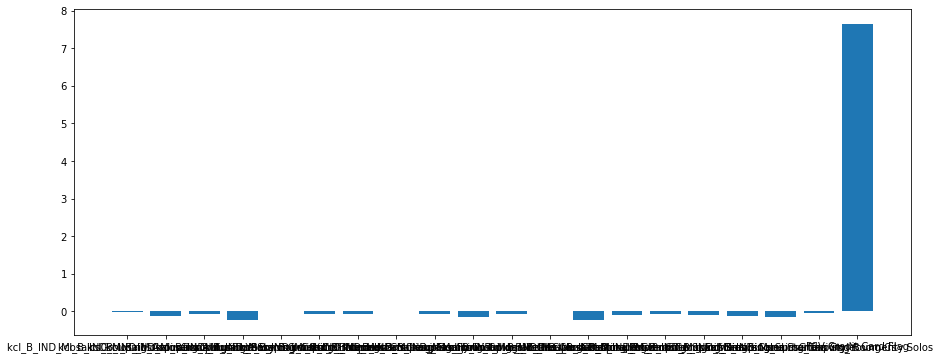

In [112]:
plt.figure(figsize = (15, 6))
plt.bar(coef_df['feature'], coef_df['coefs'])
plt.axis(rotation = 90)

In [1]:
df.head()

NameError: name 'df' is not defined

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('member_sample.csv', index_col = 0)

In [4]:
df.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [5]:
df['FSV CMSI Flag'].describe()

count     21344
unique        2
top           N
freq      20393
Name: FSV CMSI Flag, dtype: object

In [6]:
df['FSV CMSI Flag'].isnull().sum()

0

In [9]:
df.shape[0]

21344

In [14]:
df.groupby('State - Grouped')['FSV Mortgage Flag'].mean()

State - Grouped
CT    0.00000
RI    0.00129
Name: FSV Mortgage Flag, dtype: float64

In [23]:
df['Education'].value_counts()

Unknown              4264
Some College         3058
High School          2901
Completed College    1602
Graduated School      185
Name: Education, dtype: int64

In [24]:
df.groupby('Education')['Total Cost'].mean()

Education
Completed College    48.140840
Graduated School     44.439583
High School          47.322308
Some College         47.318179
Unknown              48.125212
Name: Total Cost, dtype: float64

In [25]:
df.groupby('FSV Mortgage Flag')['Total Cost'].mean()

FSV Mortgage Flag
0    47.270467
1    49.228261
Name: Total Cost, dtype: float64

In [140]:
[i for i in df.columns if i.startswith('FSV')] 

['FSV CMSI Flag',
 'FSV Credit Card Flag',
 'FSV Deposit Program Flag',
 'FSV Home Equity Flag',
 'FSV ID Theft Flag',
 'FSV Mortgage Flag']